Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [5]:
crime[crime.duplicated()].shape

(0, 4)

array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

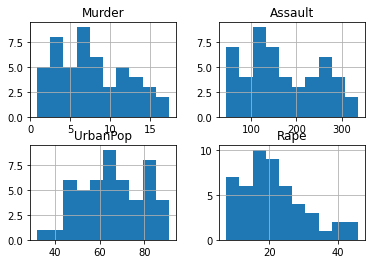

In [6]:
crime.hist()

In [7]:
crime.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

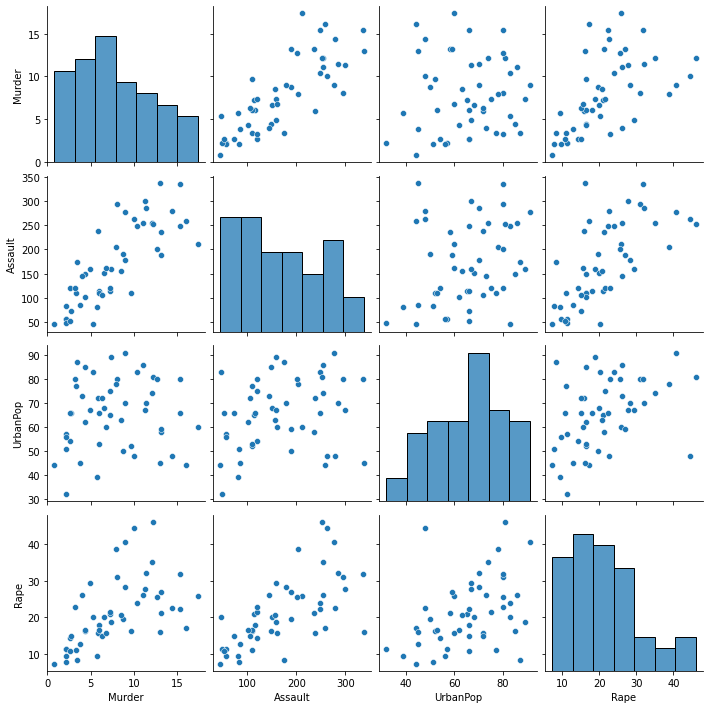

In [8]:
import seaborn as sns
# Create the default pairplot
sns.pairplot(crime)

In [9]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

 K-MEANS

C:\Users\rashm\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


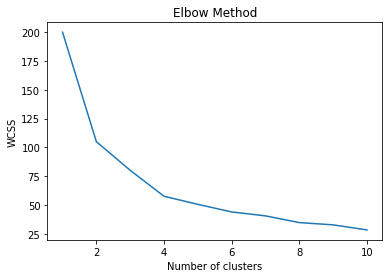

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(crime_norm)

KMeans(n_clusters=4, random_state=42)

In [12]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [13]:
#Assign clusters to the data set
crime['clusterid_Kmeans'] = clusters_new.labels_

In [14]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [15]:
crime.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [16]:
crime

,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


 DBSCAN

In [17]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [18]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [19]:
# Adding clusters to dataset
crime['clusters_dbscan']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans,clusters_dbscan
0,13.2,236,58,21.2,1,0
1,10.0,263,48,44.5,2,-1
2,8.1,294,80,31.0,2,-1
3,8.8,190,50,19.5,1,-1
4,9.0,276,91,40.6,2,-1
5,7.9,204,78,38.7,2,-1
6,3.3,110,77,11.1,0,1
7,5.9,238,72,15.8,0,-1
8,15.4,335,80,31.9,2,-1
9,17.4,211,60,25.8,1,-1


In [20]:
crime.groupby('clusters_dbscan').agg(['mean']).reset_index()

,clusters_dbscan,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans
,,mean,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667,1.555556
1,0,14.050000,238.000000,57.750000,23.200000,1.000000
2,1,4.825000,112.035714,63.357143,16.107143,1.464286


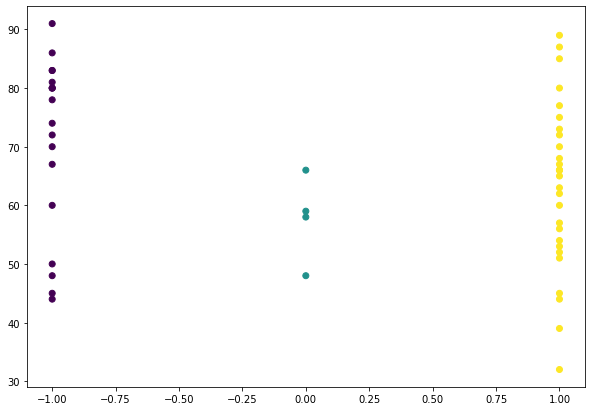

In [21]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters_dbscan'],crime['UrbanPop'], c=dbscan.labels_) 

HAC

In [22]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [23]:
crime1=pd.read_csv('crime_data.csv')
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


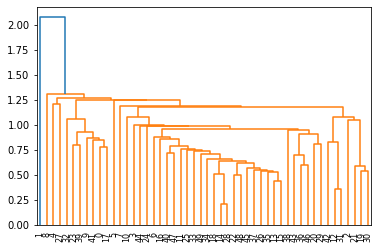

In [24]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='single'))

In [25]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [26]:
# save clusters for chart
#y_hc = hc.fit_predict(crime_norm)
#Clusters=pd.DataFrame(y_hc,columns=['Clusters_hac'])

y=pd.DataFrame(hc.fit_predict(crime_norm),columns=['clusters_hac'])
y['clusters_hac'].value_counts()

0    46
1     2
3     1
2     1
Name: clusters_hac, dtype: int64

In [27]:
# Adding clusters to dataset
crime1['clusters_hac']=hc.labels_
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_hac
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [28]:
crime1.groupby('clusters_hac').agg(['mean']).reset_index()

,clusters_hac,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,7.452174,161.130435,64.717391,19.534783
1,1,10.600000,264.000000,86.000000,43.300000
2,2,15.400000,335.000000,80.000000,31.900000
3,3,10.000000,263.000000,48.000000,44.500000


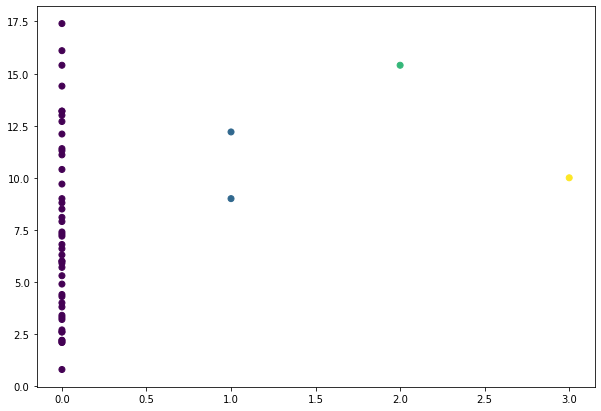

In [29]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime1['clusters_hac'],crime1['Murder'], c=hc.labels_) 